In [1]:
%run ../../src/start.py


python	3.9.5 (default, Jun  4 2021, 12:28:51) 
[GCC 7.5.0]
---------------------
Versions:
----------------------
pandas      1.3.0
numpy       1.20.2
matplotlib  3.3.4
seaborn     0.11.1
plotly      5.1.0
boto3       1.17.109
awswrangler 2.10.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## AWS
import boto3
import awswrangler as wr
----------------


GLOBAL VARIABLES
--------------------------
# Creating the low level functional client
client = boto3.client(
    's3',
    aws_access_key_id = AWS_KEY_ID,
    aws_secret_access_key = AWS_SECRET,
)
    
# Creating the high level object oriented interface
resource = boto3.resource(
    's3',
    aws_access_key_id = AWS_KEY_

## Load Data

In [2]:
# helper function
def bucket_raw_path(bucket_name,path_dir):
    ''''''
    raw_path = f's3://{bucket_name}/{path_dir}'
    return raw_path

In [3]:
raw = bucket_raw_path('dend-data',f'capstone/inter-data/crime-data/')
raw

's3://dend-data/capstone/inter-data/crime-data/'

## List objects in bucket

In [4]:
wr.s3.list_objects(raw)

['s3://dend-data/capstone/inter-data/crime-data/crime_2009.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2010.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2011.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2012.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2013.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2014.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2015.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2016.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2017.csv',
 's3://dend-data/capstone/inter-data/crime-data/crime_2018.csv']

## Create dataframe from s3 files

In [5]:
def s3_files_to_df(s3_files_path):
    ''' load s3 file path from wr result
    returns a dataframe of concat files '''
    df_list = []
    for i in wr.s3.list_objects(s3_files_path):
        temp = wr.s3.read_csv(i,)
        df_list.append(temp)
    # create df from list files
    df = pd.concat(df_list, ignore_index=True)
    return df

In [6]:
%%time
df = s3_files_to_df(raw)

CPU times: user 1.69 s, sys: 370 ms, total: 2.06 s
Wall time: 13.8 s


In [7]:
df.loc[df.duplicated(keep='first'),:]

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise,date,hour
250,2009-08-01 15:00:00,1.0,Theft,3500-3599,TERMINAL,RD,N,21I30,01A,08/01/09 00:00:00,15
498,2009-08-02 01:00:00,1.0,Theft,5200-5299,PAGEWICK,DR,E,4F20,20D,08/02/09 00:00:00,1
515,2009-08-02 02:00:00,1.0,Theft,5600-5699,SANTA CHRISTI,DR,-,16E40,20D,08/02/09 00:00:00,2
641,2009-08-02 14:00:00,1.0,Theft,900-999,GESSNER,DR,-,20G50,24J,08/02/09 00:00:00,14
717,2009-08-02 18:00:00,1.0,Theft,3600-3699,WOODCHASE,-,-,20G10,18A,08/02/09 00:00:00,18
...,...,...,...,...,...,...,...,...,...,...,...
1036363,2017-03-03 06:00:00,1.0,Theft,2400-2499,WESTHEIMER,RD,-,1A40,Apartment,2017-03-03 00:00:00,6
1037135,2017-02-26 17:00:00,1.0,Theft,14800-14899,GRISBY,-,-,20G60,Apartment,2017-02-26 00:00:00,17
1071678,2017-06-20 18:00:00,1.0,Rape,10600-10699,SABO RD,RD,-,12D20,"Road, Street, or Sidewalk",06/20/2017,18
1102683,2017-07-04 20:00:00,1.0,Robbery,1000-1099,RICHMOND,AVE,-,1A30,Drug Store or Medical Supply,07/04/2017,20


In [8]:
df.info()
#1,126,465

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126465 entries, 0 to 1126464
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   date_time     1126295 non-null  object 
 1   offenses      1126465 non-null  float64
 2   offense_type  1126465 non-null  object 
 3   block_range   1126465 non-null  object 
 4   street_name   1126465 non-null  object 
 5   type          1126465 non-null  object 
 6   suffix        1126465 non-null  object 
 7   beat          1126465 non-null  object 
 8   premise       1126465 non-null  object 
 9   date          1126465 non-null  object 
 10  hour          1126465 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 94.5+ MB


In [9]:
# convert date_time col to date_time
df.date_time = pd.to_datetime(df.date_time)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126465 entries, 0 to 1126464
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   date_time     1126295 non-null  datetime64[ns]
 1   offenses      1126465 non-null  float64       
 2   offense_type  1126465 non-null  object        
 3   block_range   1126465 non-null  object        
 4   street_name   1126465 non-null  object        
 5   type          1126465 non-null  object        
 6   suffix        1126465 non-null  object        
 7   beat          1126465 non-null  object        
 8   premise       1126465 non-null  object        
 9   date          1126465 non-null  object        
 10  hour          1126465 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 94.5+ MB


In [11]:
df.head()

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise,date,hour
0,2009-08-01,1.0,Robbery,3000-3099,DURHAM,DR,N,3B30,210,08/01/09 00:00:00,0
1,2009-08-01,1.0,Robbery,500-599,SEMINAR,DR,-,6B60,20A,08/01/09 00:00:00,0
2,2009-08-01,1.0,Robbery,8300-8399,NORTH HOUSTON ROSSLYN,RD,-,6B30,18N,08/01/09 00:00:00,0
3,2009-08-01,1.0,Robbery,6300-6399,SKYLINE,DR,-,18F30,18A,08/01/09 00:00:00,0
4,2009-08-01,1.0,Robbery,5900-5999,FULTON,ST,-,2A20,18N,08/01/09 00:00:00,0


In [12]:
df.premise.value_counts()

20A                                   83994
20R                                   83598
18A                                   74780
Residence or House                    61238
Apartment Parking Lot                 51280
                                      ...  
RES                                       2
Escort Business                           2
02V                                       1
Vacant Jail or Prison                     1
Contra-Flow, Managed, or HOV Lanes        1
Name: premise, Length: 267, dtype: int64

## Show null data

In [ ]:
df.apply(lambda x: sum(x.isnull()))

In [ ]:
# create null percentage of column as dataframe
null_per_df = pd.DataFrame(df.isna().mean().round(4) * 100)
# rename columns
null_per_df.rename(columns={'index': 'col_name', 0: 'null_percent'}, inplace=True)

# filter data <20% null values
per_filter = null_per_df.null_percent<=90
null_per_df[per_filter].sort_values(by='null_percent',ascending=False)

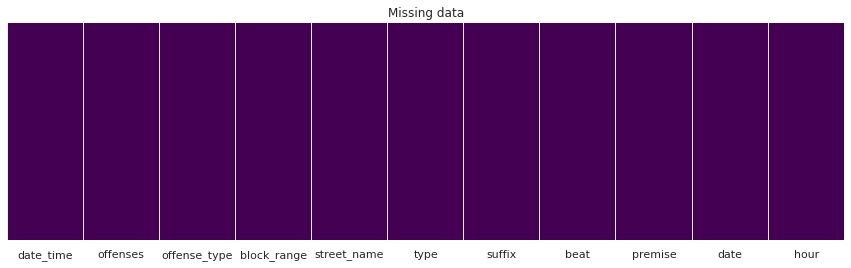

In [13]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126465 entries, 0 to 1126464
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   date_time     1126295 non-null  datetime64[ns]
 1   offenses      1126465 non-null  float64       
 2   offense_type  1126465 non-null  object        
 3   block_range   1126465 non-null  object        
 4   street_name   1126465 non-null  object        
 5   type          1126465 non-null  object        
 6   suffix        1126465 non-null  object        
 7   beat          1126465 non-null  object        
 8   premise       1126465 non-null  object        
 9   date          1126465 non-null  object        
 10  hour          1126465 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 94.5+ MB


In [15]:
df.head()

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise,date,hour
0,2009-08-01,1.0,Robbery,3000-3099,DURHAM,DR,N,3B30,210,08/01/09 00:00:00,0
1,2009-08-01,1.0,Robbery,500-599,SEMINAR,DR,-,6B60,20A,08/01/09 00:00:00,0
2,2009-08-01,1.0,Robbery,8300-8399,NORTH HOUSTON ROSSLYN,RD,-,6B30,18N,08/01/09 00:00:00,0
3,2009-08-01,1.0,Robbery,6300-6399,SKYLINE,DR,-,18F30,18A,08/01/09 00:00:00,0
4,2009-08-01,1.0,Robbery,5900-5999,FULTON,ST,-,2A20,18N,08/01/09 00:00:00,0


## Explore Each Column

In [16]:
def create_new_cell(contents):
    '''created new jupyter cells by inputing a list of columns
    outputs'''
    from IPython.core.getipython import get_ipython
    shell = get_ipython()
    payload = dict(
        source='set_next_input',
        #text=f'#column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]'.format(contents),
        text=f'# column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]',
        replace=False,)
    shell.payload_manager.write_payload(payload, single=False)

    
def strip_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df[col] = df[col].str.strip()
    print('after:{}'.format(len(df[col].value_counts(dropna=False))))    
    
def lower_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df[col] = df[col].str.lower()
    print('after:{}'.format(len(df[col].value_counts(dropna=False))))       
    
    
    
def capital_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df[col] = df[col].str.capitalize()
    print('after:{}'.format(len(df[col].value_counts(dropna=False))))      

In [ ]:
col_list = df.columns.tolist()
col_list

In [ ]:
df.date.value_counts(dropna=False)

In [ ]:
df.date_time.value_counts(dropna=False)

In [ ]:
df.hour.value_counts(dropna=False)

In [ ]:
# # only run once
# for col in col_list:
#     create_new_cell(col)

In [ ]:
# column:year
df.year.value_counts(dropna=False)

In [ ]:
# column:premise
df.premise.value_counts(dropna=False)[:10]

In [17]:
# get total unique values
len(df.premise.unique())

267

In [18]:
df.premise.unique()

array(['210', '20A', '18N', '18A', '20R', '040', '250', '070', '20D',
       '13R', '140', '11P', '03B', '09D', '18M', '240', '120', '05O',
       '02B', '05Z', '080', '18G', '18H', '01A', '20V', '18O', '18T',
       '05G', '18P', '20G', '18R', '060', '23S', '20L', '20P', '18U',
       '18C', '05R', '05L', '20C', '05T', '11R', '18L', '05W', '24J',
       '18W', '190', '13H', '13B', '14V', '05C', '170', '03S', '05H',
       '13S', '20W', '24E', '100', '22E', '20M', '01P', '22P', '24C',
       '22U', '24F', '05D', '20N', '18B', '09H', '13A', '22D', '11G',
       '05E', '01B', '24T', '05V', '05M', '05X', '05F', '11S', '24P',
       '19V', '05P', '11F', '24B', '09P', '24A', '02C', '24S', '05B',
       '18S', '05S', '22M', '05Q', '05N', '09R', '22H', '02S', '24V',
       '25V', '24G', '150', '160', '13T', '18D', '05A', '11C', '22C',
       '20H', '09V', '11L', '04V', '---', '05Y', '21V', '11V', '12V',
       '01K', '05U', '23C', 'RES', '22V', '25R', '01R', '01T', '24M',
       '13C', '02V',

In [ ]:
# get only values that are less than 4 in length
df[df.premise.str.len()<4]

In [ ]:
# only the premise column
df[df.premise.str.len()<4].premise

In [ ]:
# unique values
df[df.premise.str.len()<4].premise.unique()

In [ ]:
limited = df[df.premise.str.len()<4]
limited.head()

In [ ]:
limited.info()

In [ ]:
limited.premise.value_counts()

In [ ]:
limited.year.value_counts()

# load premise dataset

In [ ]:
ls ../../data/raw/crime_data/

In [23]:
file = 'premise_codes.csv'
raw_directory = os.path.join('..','..','data','raw','crime_data',f'{file}')
raw_directory

'../../data/raw/crime_data/premise_codes.csv'

In [24]:
premise_df = pd.read_csv(raw_directory)
premise_df.columns = premise_df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_')
premise_df.head()

,premise_type,premise_description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [ ]:




premise_df.columns = premise_df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# rename premise column for easy merge
premise_df.rename(columns={'premise_type': 'premise',}, inplace=True)
premise_df.head()

In [ ]:
# # rename premise column for easy merge
# premise_df.rename(columns={'premise_type': 'premise',}, inplace=True)
# premise_df.head()

In [ ]:
# create null percentage of column as dataframe
null_per_df = pd.DataFrame(premise_df.isna().mean().round(4) * 100)
# rename columns
null_per_df.rename(columns={'index': 'col_name', 0: 'null_percent'}, inplace=True)

# filter data <20% null values
per_filter = null_per_df.null_percent<=90
null_per_df[per_filter].sort_values(by='null_percent',ascending=False)

In [ ]:
premise_df.head()

## merge with dataframe

In [ ]:
# merge with premise df
df = pd.merge(df,premise_df, on='premise', how='outer')
df.info()

In [ ]:
df.head()

In [ ]:
df.premise_description.value_counts(dropna=False)

In [ ]:
df[['premise','premise_description']]

In [ ]:
df.premise.value_counts()

In [ ]:
# merge ,
# if value is null in premise_descriptiom, copy the matching row of premise to it
df.loc[df['premise_description'].isnull(),'premise_description'] = df['premise']

In [ ]:
df.head()

In [ ]:
df[['premise','premise_description']]

In [ ]:
len(df.premise_description.unique())

In [ ]:
df.premise_description.value_counts()

In [ ]:
strip_col('premise_description')

In [ ]:
lower_col('premise_description')

In [ ]:
df.premise_description = df.premise_description.str.replace('/', ' ').str.replace(',', ' ').str.replace('(', '').str.replace(')', '').str.strip()

In [ ]:
len(df.premise_description.value_counts())

In [ ]:
df[df.year.isna()]

In [ ]:
df = df[~df.year.isna()]

In [ ]:
df.info()

In [ ]:
df.premise_description.value_counts()

In [ ]:
df[df.premise_description.str.len()<=4].premise_description.value_counts()

# find most common workd

In [ ]:
from collections import Counter
Counter(" ".join(df.premise_description).split()).most_common(50)

In [ ]:
len(df.premise_description.value_counts(dropna=False))

In [ ]:
df[df.date_time.isna()]

In [ ]:
# only non null values
df = df[~df.date_time.isna()]

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['offenses'] = df['offenses'].astype('int64')
df['year'] = df['year'].astype('int64')
df['hour'] = df['hour'].astype('int64')

In [ ]:
df.head()

In [ ]:
df.apply(lambda x: sum(x.isnull()))

In [ ]:
# column:beat
df.beat.value_counts(dropna=False)

In [ ]:
df.beat.unique()

In [ ]:
# replace extra ' with empty space
df['beat'] = df.beat.str.replace("'", " ")

In [ ]:
strip_col('beat')

In [ ]:
df.beat.unique()

In [ ]:
df.head()

In [ ]:
# column:suffix
df.suffix.value_counts(dropna=False)

In [ ]:
# column:type
df.type.value_counts(dropna=False)

In [ ]:
strip_col('type')

In [ ]:
lower_col('type')

# Street Name
- lowercase all to merge

In [ ]:
# column:street_name
df.street_name.value_counts(dropna=False)[:10]

In [ ]:
df[df.street_name.str.contains('NAN')].street_name.unique().tolist()

In [ ]:
test = df.copy()

In [ ]:
df.street_name = df.street_name.replace('NAN',np.nan)

In [ ]:
df[df.street_name.str.contains('NAN')].street_name.unique().tolist()

In [ ]:
df.info()

In [ ]:
df[df.street_name.isna()]

In [ ]:
# CHANGE Nan with unk

In [ ]:
df.street_name.fillna('UNK',inplace=True)

In [ ]:
df[df.street_name.isna()]

In [ ]:
strip_col('street_name')

In [ ]:
capital_col('street_name')

In [ ]:
df.street_name

In [ ]:
# column:block_range
df.block_range.value_counts(dropna=False)[:30]

In [ ]:
strip_col('block_range')

In [ ]:
# column:offense_type
df.offense_type.value_counts(dropna=False)[:10]

In [ ]:
# combine Auto Theft & AutoTheft
# join Auto Theft & AutoTheft
df.offense_type = df.offense_type.replace('AutoTheft','Auto Theft')

In [ ]:
# column:offense_type
df.offense_type.value_counts(dropna=False)[:10]

## Find out where the '1' comes from

In [ ]:
df[df.offense_type.str.contains('1')]

# remove it

In [ ]:
# show the oposite of result of '1'. ie only show values that are NOT '1'
# 1,126,346
df = df[~df.offense_type.str.contains('1')]

In [ ]:
df[df.offense_type.str.contains('1')]

In [ ]:
# column:offense_type
df.offense_type.value_counts(dropna=False)[:10]

In [ ]:
# column:offenses
df.offenses.value_counts(dropna=False)[:20]

In [ ]:
# column:date_time
df.date_time.value_counts(dropna=False)[:10]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
df.info()
# 1,122,377

In [ ]:
df.head()

In [ ]:
df.hour.value_counts()

In [ ]:
t = df[df.hour ==24]
d = df[df.hour ==0]


In [ ]:
df.date_time.min()

In [ ]:
d.date_time.dt.hour

In [ ]:
t.date_time.dt.hour

In [ ]:
t.date_time.dt.day

In [ ]:
t

# Select ony dates from `2009` to `2018`


In [ ]:
df.date_time.min()

In [ ]:
df.date_time.max()

In [ ]:
#greater than the start date and smaller than the end date
start_date = '2009-01-01' #Jan 01 2009
end_date = '2018-12-31' # may 31 2018
mask = (df['date_time'] > start_date) & (df['date_time'] <= end_date)

In [ ]:
df2 = df.loc[mask].reset_index(drop=True)
df2.info()
#  1,121,231

In [ ]:
df2.head()

In [ ]:
df2.date_time.min()

In [ ]:
df2.date_time.max()

# check for nulls befor saving

In [ ]:
df2.apply(lambda x: sum(x.isnull()))

In [ ]:
df2.info()

In [ ]:
df2.iloc[202620]

In [ ]:
df2.loc[df2['date_time'] == '2011-04-30 06:00:00']


In [ ]:
df2.loc[df2.duplicated(keep='first'),:]

In [ ]:
df[df.street_name.str.contains('nan')].street_name.unique().tolist()

In [ ]:
df[df.street_name.str.contains('nan st')]

# Save dataframe

In [ ]:
def s3_files_to_df(s3_files_path):
    ''' load s3 file path from wr result
    returns a dataframe of concat files '''
    df_list = []
    for i in wr.s3.list_objects(s3_files_path):
        temp = wr.s3.read_excel(i, engine='openpyxl')
        df_list.append(temp)
    # create df from list files
    df = pd.concat(df_list, ignore_index=True)
    return df

In [ ]:
bucket = 'dend-data'
file_name = f'crime-09-18.csv'
path_to_save = f"s3://{bucket}/capstone/final-data/crime-data/{file_name}"
path_to_save

In [ ]:
%%time
wr.s3.to_csv(df2, path_to_save, index=False)

# Save Sample

In [ ]:
%%time
sample_1000 = df2.sample(1000)
sample_1000.info()

In [ ]:
sample_1000.head()

In [ ]:
bucket = 'dend-data'
file_name = f'crime-09-18.csv'
path_to_save = f"s3://{bucket}/capstone/sample-data/crime-data/{file_name}"

wr.s3.to_csv(sample_1000, path_to_save, index=False)